# Basic Reproduction Number

In epidemiology, the basic reproduction number (sometimes called basic reproductive ratio, or incorrectly basic reproductive rate, and denoted R0, pronounced R nought or R zero) of an infection can be thought of as the expected number of cases directly generated by one case in a population where all individuals are susceptible to infection.

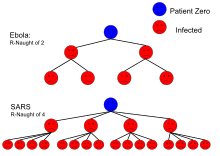

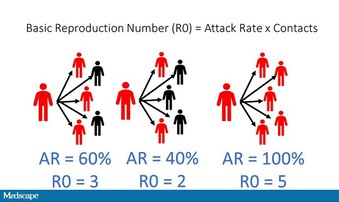

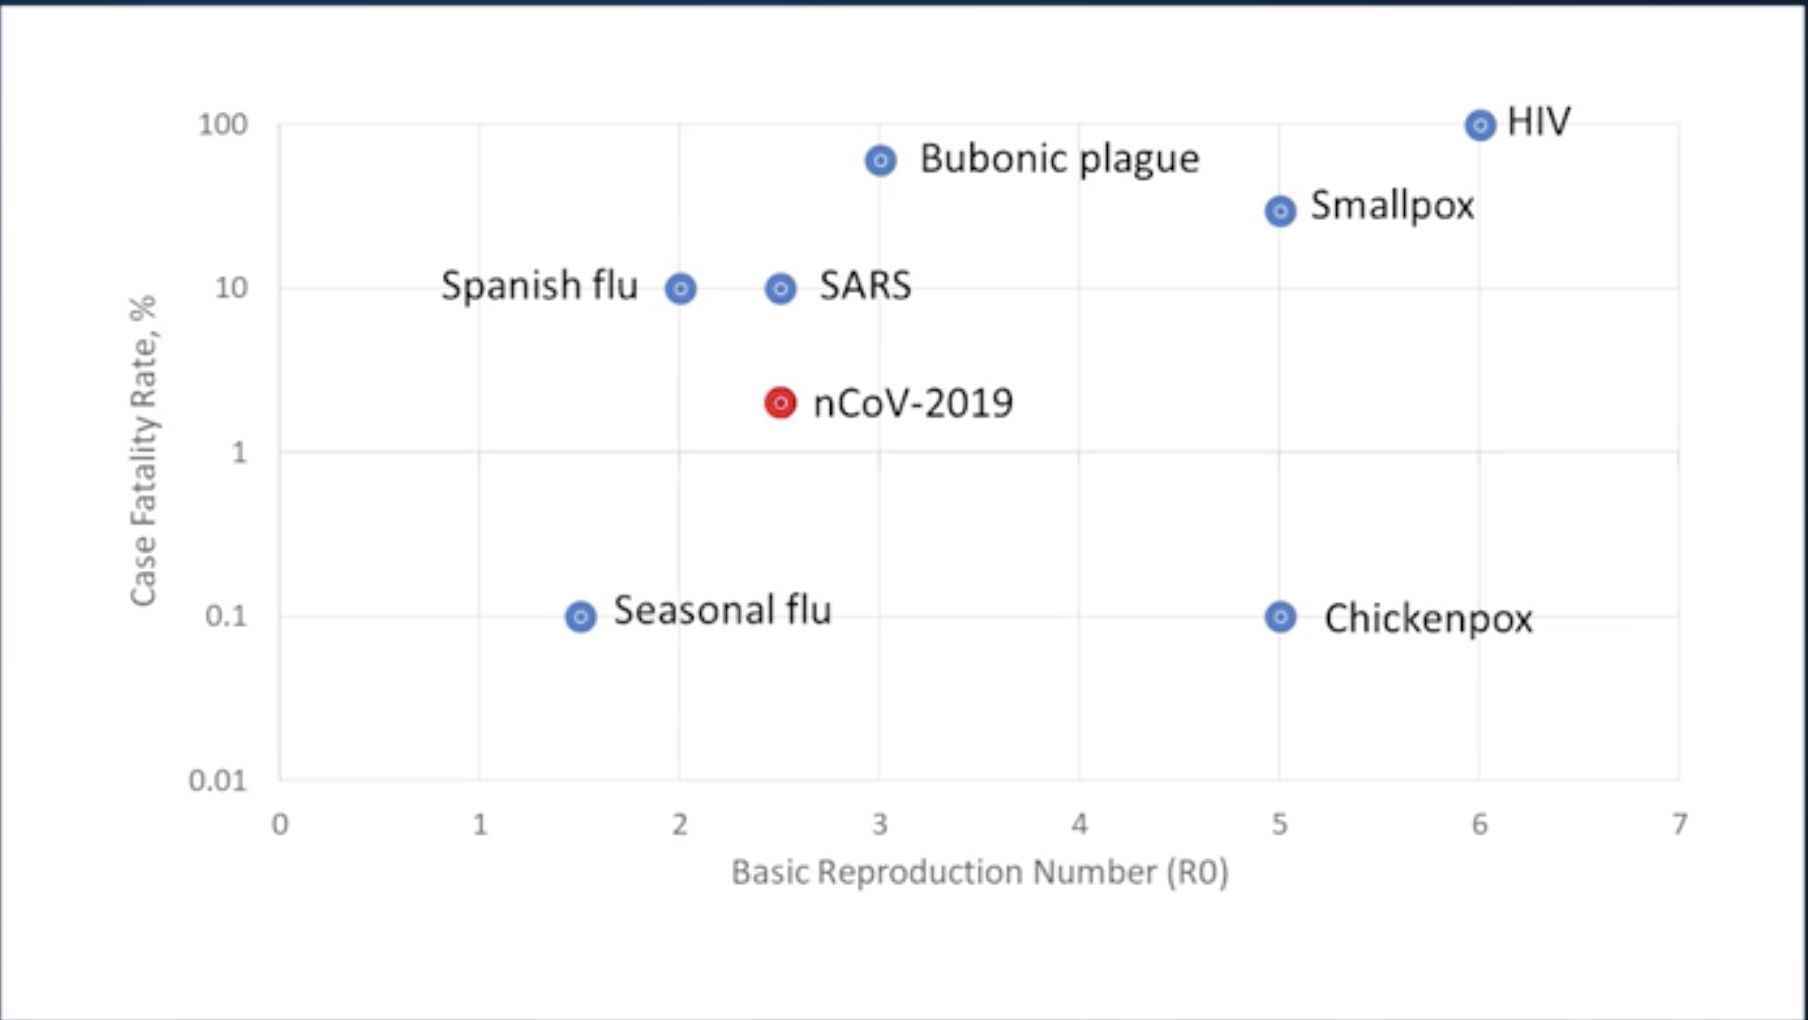

https://www.medscape.com/viewarticle/924319

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy import ndimage
%matplotlib inline

pyplot.style.use("fivethirtyeight")# for pretty graphs
# Increase the default plot size
pyplot.rcParams['figure.figsize'] = 20, 10

def generateGrowthCurveOfBRN(sampleR0Values, generations):
    infected = np.zeros ( (generations, len(sampleR0Values)))
    for generation in range(generations):
        if generation == 0:
            infected[generation] = 1
        else:
            infected[generation] = infected[generation-1] + sampleR0Values*infected[generation-1]
    return infected

def plotBRN(sampleR0Values, infected) :
    fig, ax1 = pyplot.subplots(figsize=(20,10))

    color1 = 'tab:red'
    ax1.set_ylabel('super-1 R0')
    ax1.set_prop_cycle(color=['red', 'magenta', 'black', 'orange'])

    color2 = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.set_ylabel('sub-1 R0')
    ax2.set_prop_cycle(color=['yellow', 'lightgreen', 'blue', ])

    index = 0
    for sampleR0 in sampleR0Values:   
        if sampleR0 > 1:
            axis = ax1
        else:
            axis = ax2
        axis.plot(infected[:,index], label="R0="+str(sampleR0))
        index = index + 1
    
    ax1.legend(loc=2)
    ax2.legend(loc=1)

    pyplot.show()

## Sample R0s and their growth curve

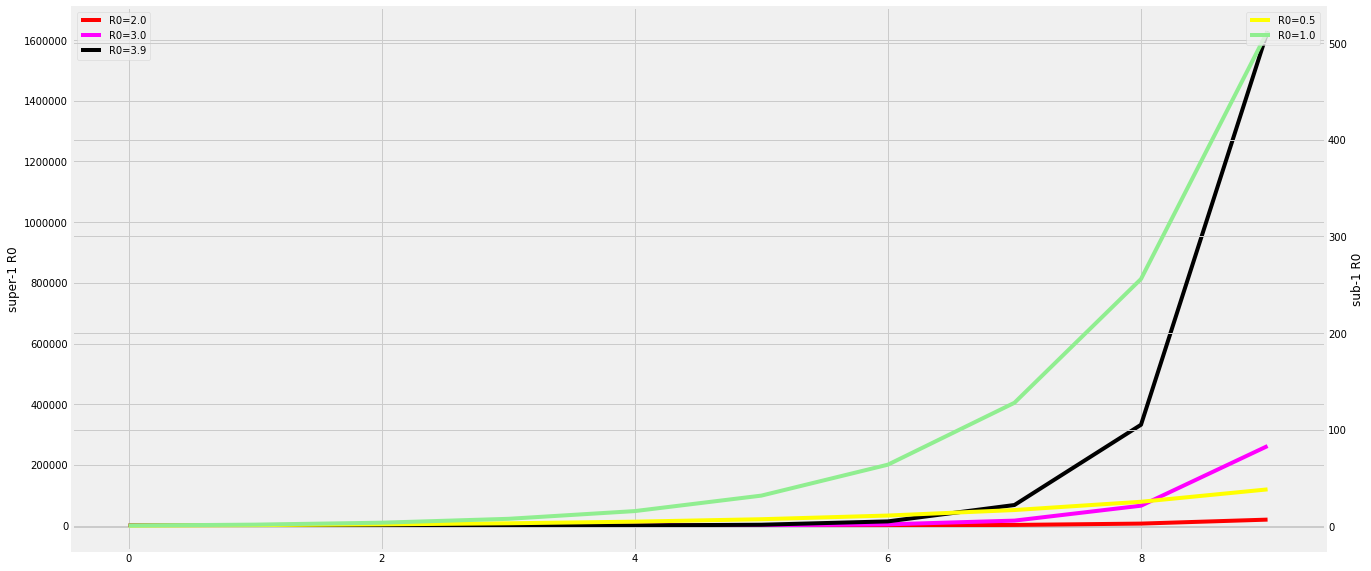

In [2]:
sampleR0Values = np.array([ 0.5, 1, 2, 3, 3.9])
generations = 10
infected = generateGrowthCurveOfBRN(sampleR0Values, generations)
    
plotBRN(sampleR0Values,infected)

## Reverse - generations to infect population

In [3]:
import math

#Population of India
population = 1.2*1000*1000*1000
for r0 in sampleR0Values:
    print("Days to infect ",population,", for r0=",r0," = ",math.log(population)/math.log(1+r0))
    

Days to infect  1200000000.0 , for r0= 0.5  =  51.55952257219494
Days to infect  1200000000.0 , for r0= 1.0  =  30.160387259820055
Days to infect  1200000000.0 , for r0= 2.0  =  19.02908570145799
Days to infect  1200000000.0 , for r0= 3.0  =  15.080193629910028
Days to infect  1200000000.0 , for r0= 3.9  =  13.154495524913067


## Values of R0 of well-known infectious diseases

In [4]:
from io import StringIO
import pandas as pd
from IPython.display import display, HTML

R0Values = StringIO("""
Disease,Transmission,R0
Measles,Airborne,12–18
Chickenpox (varicella),Airborne,10-12
Rubella,Airborne droplet,5–7
Mumps,Airborne droplet,4–7
Pertussis,Airborne droplet,5.5
Smallpox,Airborne droplet,3.5–6
HIV/AIDS,Body fluids,2–5
SARS,Airborne droplet,2–5
Diphtheria,Saliva,1.7–4.3
COVID-19,Airborne droplet,1.4–3.9
Influenza (1918 pandemic strain),Airborne droplet,1.4–2.8
Ebola (2014 Ebola outbreak), Body fluids, 1.5–2.5
Influenza (2009 pandemic strain), Airborne droplet, 1.4–1.6
Influenza (seasonal strains), Airborne droplet, 0.9–2.1
MERS,Airborne droplet, 0.3–0.8
""")

df = pd.read_csv(R0Values)
display(HTML(df.to_html()))

,Disease,Transmission,R0
0,Measles,Airborne,12–18
1,Chickenpox (varicella),Airborne,10-12
2,Rubella,Airborne droplet,5–7
3,Mumps,Airborne droplet,4–7
4,Pertussis,Airborne droplet,5.5
5,Smallpox,Airborne droplet,3.5–6
6,HIV/AIDS,Body fluids,2–5
7,SARS,Airborne droplet,2–5
8,Diphtheria,Saliva,1.7–4.3
9,COVID-19,Airborne droplet,1.4–3.9


## A changing R0 by dampening factor

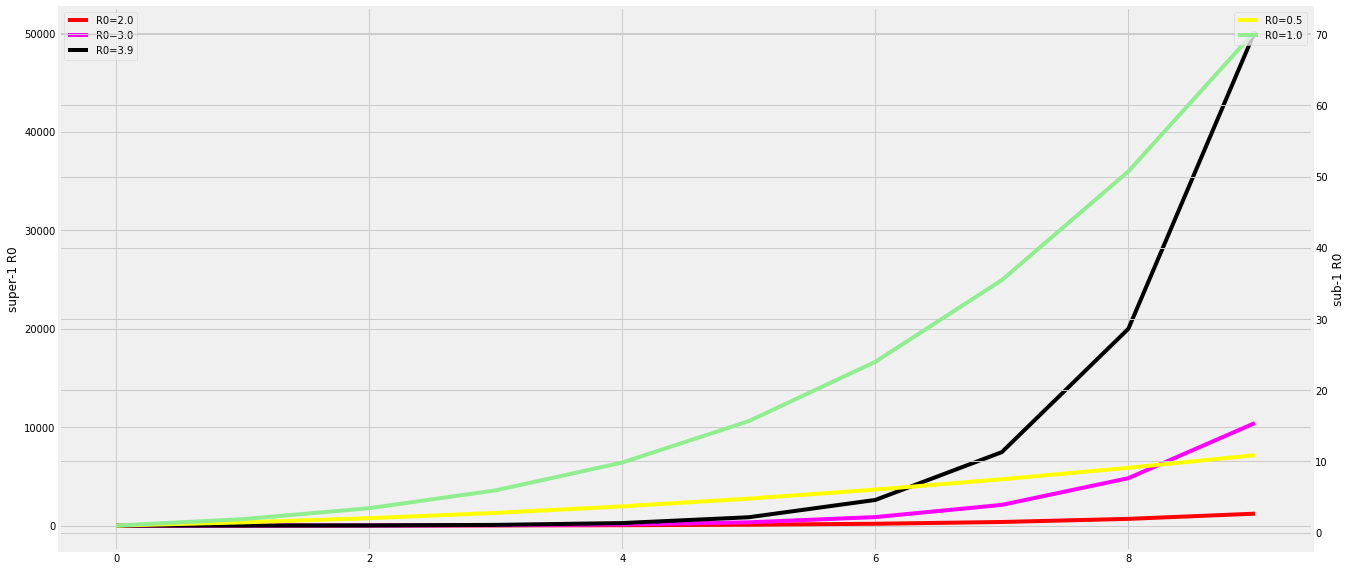

In [5]:
def generateGrowthCurveOfBRNWithDampening(sampleR0Values, generations, dampeningFactor):
    infected = np.zeros ( (generations, len(sampleR0Values)))
    for generation in range(generations):
        if generation == 0:
            infected[generation] = 1
        else:
            infected[generation] = infected[generation-1] + sampleR0Values*infected[generation-1]
        sampleR0Values = sampleR0Values*(1-dampeningFactor)
    return infected

dampeningInfected = generateGrowthCurveOfBRNWithDampening(sampleR0Values, generations, 0.1)
plotBRN(sampleR0Values,dampeningInfected)

In [6]:
#People saved at end of generations
delta = infected[-1] - dampeningInfected[-1]
df = pd.DataFrame([sampleR0Values, delta])
display(HTML(df.to_html()))

,0,1,2,3,4
0,0.500000,1.000000,2.000000,3.000000,3.900000e+00
1,27.563982,441.629179,18470.773269,251730.209775,1.578235e+06


## Uses of R0

R0 does not by itself give an estimate of how fast an infection spreads in the population.

The most important uses of R0 are determining if an emerging infectious disease can spread in a population and determining what proportion of the population should be immunized through vaccination to eradicate a disease. In commonly used infection models, when R0 > 1 the infection will be able to start spreading in a population, but not if R0 < 1. Generally, the larger the value of R0, the harder it is to control the epidemic. For simple models, the proportion of the population that needs to be effectively immunized (meaning not susceptible to infection) to prevent sustained spread of the infection has to be larger than 1 − 1/R0. Conversely, the proportion of the population that remains susceptible to infection in the endemic equilibrium is 1/R0.